In [4]:
pip install parser

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement parser (from versions: none)
ERROR: No matching distribution found for parser


1- Write a program that takes a string as input, and counts the frequency of each word in the string, there might
be repeated characters in the string. Your task is to find the highest frequency and returns the length of the
highest-frequency word.

In [2]:
from collections import Counter
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import requests
import json
import csv
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


In [7]:
string = 'write write write all the number from from from 1 to 100'
len(max(Counter(string.split())))

5

2-Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

In [8]:
s = 'abc'
if max(Counter(s).values())==min(Counter(s).values()):
    print("Yes")
else:
    print("No")

Yes


3- Write a program, which would download the data from the provided link, and then read the data and convert
that into properly structured data and return it in Excel format.


In [9]:
url= 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response=requests.get(url)
df = json_normalize(response.json())
df.to_excel('pokedex.xlsx')

#Note- i am unable to perform any operation for this question because url of this json file blocked by jio internet.


KeyboardInterrupt: 

4- Write a program to download the data from the link given below and then read the data and convert the into
the proper structure and return it as a CSV file

In [10]:
url='https://data.nasa.gov/resource/y77d-th95.json'
data=pd.read_json(url)
data.pop(':@computed_region_nnqa_25f4')
data.pop(':@computed_region_cbhk_fwbd')
data.to_csv("nasa.csv")

In [11]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."
...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13..."
996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29..."
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -..."
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -..."


In [ ]:
# data.columns.values.tolist()
data.loc[0][1]

1

In [12]:
data['name']

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
995     Tirupati
996      Tissint
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: name, Length: 1000, dtype: object

In [13]:
#finding deffrent characteristics from given name = 'Tomakovka'

print("id of Tomakovka - ",data.loc[data['name']=='Tomakovka','id'].iloc[0])
print("Mass of Earth Meteorite - ",data.loc[data['name']=='Tomakovka','mass'].iloc[0])
print("Year at which Earth Meteorite was hit - ",data.loc[data['name']=='Tomakovka','year'].iloc[0])
print("datetime format reclat - ",data.loc[data['name']=='Tomakovka','reclat'].iloc[0])
print("floatpoint coordinates - ",data.loc[data['name']=='Tomakovka','geolocation'].iloc[0])
print("Float reclong - ",data.loc[data['name']=='Tomakovka','reclong'].iloc[0])


id of Tomakovka -  24019
Mass of Earth Meteorite -  600.0
Year at which Earth Meteorite was hit -  1905-01-01T00:00:00.000
datetime format reclat -  47.85
floatpoint coordinates -  {'type': 'Point', 'coordinates': [34.76667, 47.85]}
Float reclong -  34.76667


5 - Write a program to download the data from the given API link and then extract the following data with
proper formatting

In [14]:
url='http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes'
response = requests.get(url).json()

In [15]:
episodes = response['_embedded']['episodes']
extracted_data = []

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

for episode in episodes:
    episode_data = {}
    episode_data['id'] = episode['id']
    episode_data['url'] = episode['url']
    episode_data['name'] = episode['name']
    episode_data['season'] = episode['season']
    episode_data['number'] = episode['number']
    episode_data['type'] = episode['type']
    episode_data['airdate'] = episode['airdate']
    episode_data['airtime'] = episode['airtime']
    episode_data['runtime'] = episode['runtime']
    episode_data['average_rating'] = episode['rating']['average']
    episode_data['summary'] = remove_html_tags(episode['summary'])
    episode_data['medium_image'] = episode['image']['medium']
    episode_data['original_image'] = episode['image']['original']

    extracted_data.append(episode_data)

In [16]:
for i in range(len(extracted_data)):
    print(extracted_data[i])

{'id': 869671, 'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original', 'name': 'The Original', 'season': 1, 'number': 1, 'type': 'regular', 'airdate': '2016-10-02', 'airtime': '21:00', 'runtime': 68, 'average_rating': 8, 'summary': "A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.", 'medium_image': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg', 'original_image': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'}
{'id': 911201, 'url': 'https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut', 'name': 'Chestnut', 'season': 1, 'number': 2, 'type': 'regular', 'airdate': '2016-10-09', 'airtime': '21:00', 'runtime': 60, 'average_rating': 7.7, '

Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding
Insights to be drawn -
    ● Get all the Earth meteorites that fell before the year 2000
    ● Get all the earth meteorites co-ordinates who fell before the year 1970
    ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
    than 10000kg

In [17]:
url = 'nasa.csv'
data = pd.read_csv(url)
data

,Unnamed: 0,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation
0,0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50...."
1,1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56..."
2,2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216..."
3,3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88..."
4,4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33...."
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01T00:00:00.000,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13..."
996,996,Tissint,54823,Valid,Martian (shergottite),7000.0,Fell,2011-01-01T00:00:00.000,29.48195,-7.61123,"{'type': 'Point', 'coordinates': [-7.61123, 29..."
997,997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01T00:00:00.000,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -..."
998,998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01T00:00:00.000,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -..."


In [18]:
#Here i am filtering the data for meteorite name and year which were fell before year 2000
for i in range(len(data)):
    try:
        if int(data["year"][i].split("-")[0])< 2000:
            print(f"Name of {i+1}th meterite fell in {int(data['year'][i].split('-')[0])} is ",data["name"][i])
    except:
        pass


Name of 1th meterite fell in 1880 is  Aachen
Name of 2th meterite fell in 1951 is  Aarhus
Name of 3th meterite fell in 1952 is  Abee
Name of 4th meterite fell in 1976 is  Acapulco
Name of 5th meterite fell in 1902 is  Achiras
Name of 6th meterite fell in 1919 is  Adhi Kot
Name of 7th meterite fell in 1949 is  Adzhi-Bogdo (stone)
Name of 8th meterite fell in 1814 is  Agen
Name of 9th meterite fell in 1930 is  Aguada
Name of 10th meterite fell in 1920 is  Aguila Blanca
Name of 11th meterite fell in 1974 is  Aioun el Atrouss
Name of 12th meterite fell in 1925 is  Aïr
Name of 13th meterite fell in 1769 is  Aire-sur-la-Lys
Name of 14th meterite fell in 1949 is  Akaba
Name of 15th meterite fell in 1838 is  Akbarpur
Name of 16th meterite fell in 1959 is  Akwanga
Name of 17th meterite fell in 1981 is  Akyumak
Name of 18th meterite fell in 1957 is  Al Rais
Name of 20th meterite fell in 1806 is  Alais
Name of 21th meterite fell in 1766 is  Albareto
Name of 22th meterite fell in 1949 is  Alberta


In [19]:
#Here i am filtering the data for meteorite coordinates which were fell before year 1970
for i in range(len(data)):
    try:
        if int(data["year"][i].split("-")[0])< 1970:
            print(f"Co-ordinates of {i+1}th meterite fell in {int(data['year'][i].split('-')[0])} is ",data["geolocation"][i])
    except:
        pass
data["geolocation"][1]

Co-ordinates of 1th meterite fell in 1880 is  {'type': 'Point', 'coordinates': [6.08333, 50.775]}
Co-ordinates of 2th meterite fell in 1951 is  {'type': 'Point', 'coordinates': [10.23333, 56.18333]}
Co-ordinates of 3th meterite fell in 1952 is  {'type': 'Point', 'coordinates': [-113, 54.21667]}
Co-ordinates of 5th meterite fell in 1902 is  {'type': 'Point', 'coordinates': [-64.95, -33.16667]}
Co-ordinates of 6th meterite fell in 1919 is  {'type': 'Point', 'coordinates': [71.8, 32.1]}
Co-ordinates of 7th meterite fell in 1949 is  {'type': 'Point', 'coordinates': [95.16667, 44.83333]}
Co-ordinates of 8th meterite fell in 1814 is  {'type': 'Point', 'coordinates': [0.61667, 44.21667]}
Co-ordinates of 9th meterite fell in 1930 is  {'type': 'Point', 'coordinates': [-65.23333, -31.6]}
Co-ordinates of 10th meterite fell in 1920 is  {'type': 'Point', 'coordinates': [-64.55, -30.86667]}
Co-ordinates of 12th meterite fell in 1925 is  {'type': 'Point', 'coordinates': [8.38333, 19.08333]}
Co-ordina

"{'type': 'Point', 'coordinates': [10.23333, 56.18333]}"

In [20]:
#Here i am filtering the data for meteorite weight more than 10000 kg.
for i in range(len(data)):
    try:
        if data["mass"][i]< 10000:
            print(f"Name of meterite is {data['name'][i]} having mass is in KG ",data["mass"][i])
    except:
        pass

Name of meterite is Aachen having mass is in KG  21.0
Name of meterite is Aarhus having mass is in KG  720.0
Name of meterite is Acapulco having mass is in KG  1914.0
Name of meterite is Achiras having mass is in KG  780.0
Name of meterite is Adhi Kot having mass is in KG  4239.0
Name of meterite is Adzhi-Bogdo (stone) having mass is in KG  910.0
Name of meterite is Aguada having mass is in KG  1620.0
Name of meterite is Aguila Blanca having mass is in KG  1440.0
Name of meterite is Aioun el Atrouss having mass is in KG  1000.0
Name of meterite is Akaba having mass is in KG  779.0
Name of meterite is Akbarpur having mass is in KG  1800.0
Name of meterite is Akwanga having mass is in KG  3000.0
Name of meterite is Al Rais having mass is in KG  160.0
Name of meterite is Al Zarnkh having mass is in KG  700.0
Name of meterite is Alais having mass is in KG  6000.0
Name of meterite is Albareto having mass is in KG  2000.0
Name of meterite is Alberta having mass is in KG  625.0
Name of meteri

Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

In [21]:
#total avg rating and plot a graph between season and avg_rating
sum=0
for i in range(len(extracted_data)):
    sum+=extracted_data[i]['average_rating']
print("total average rating= ",round(sum/len(extracted_data), 2))
# Using plotly.express
df = extracted_data
fig = px.bar(df, x='season', y="average_rating")
fig.show()

total average rating=  7.87


In [22]:
#name of the shows having average rating more than 8
for i in range(len(extracted_data)):
    if extracted_data[i]['average_rating']>8:
        print(extracted_data[i]['name'])

Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind
Kiksuya
Vanishing Point
The Passenger


In [23]:
# all the episode names that aired before May 2019
for i in range(len(extracted_data)):
        date=extracted_data[1]['airdate'].split("-")
        if date[0]<='2019' and date[1]<='5':
                print(extracted_data[i]['name'])

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger
Parce Domine
The Winter Line
The Absence of Field
The Mother of Exiles
Genre
Decoherence
Passed Pawn
Crisis Theory
The Auguries
Well Enough Alone
Années Folles
Generation Loss
Zhuangzi
Fidelity
Metanoia
Que Será, Será


In [10]:
for i in range(len(extracted_data)):
       print( extracted_data[i]['summary'])
       print()
       

NameError: name 'extracted_data' is not defined

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Cars that do not qualify for clean alternative fuel vehicle:
          Make    Model
0        TESLA  MODEL X
1        HONDA  CLARITY
2        TESLA  MODEL 3
3       NISSAN     LEAF
4        TESLA  MODEL S
...        ...      ...
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130441   TESLA  MODEL X
130442   TESLA  MODEL 3

[130443 rows x 2 columns]
TESLA cars made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]
Cars with electric range > 100 and made after 2015:
          Make    Model  Electric Range
0        TESLA  MODEL X             238
2        TESLA  MODEL 3             220
4        TESLA  MODEL S             210
12       TESLA  MO

<Figure size 1000x600 with 0 Axes>

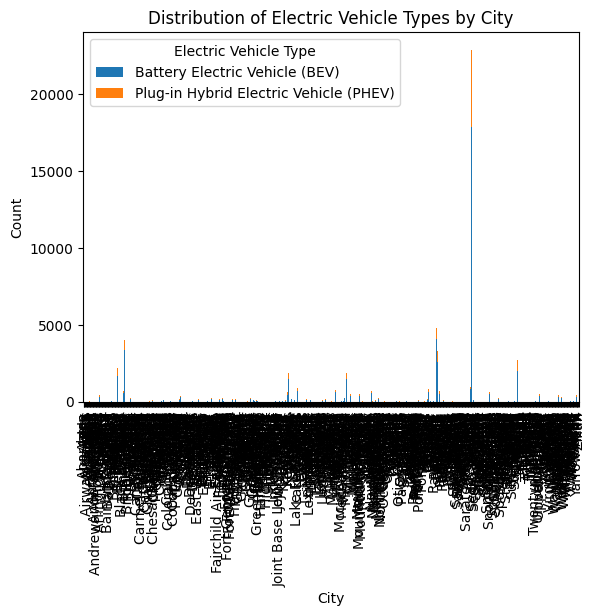

In [2]:
# Read the data from the URL
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

# Getting all the cars and their types that do not qualify for clean alternative fuel vehicle
polluted_cars = data[data["Electric Vehicle Type"] != "Clean Alternative Fuel Vehicle"]
polluted_cars_info = polluted_cars[["Make", "Model"]]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(polluted_cars_info)

# Getting all TESLA cars with the model year and model type made in Bothell City
tesla_cars = data[(data["Make"] == "TESLA") & (data["City"] == "Bothell")]
tesla_cars_info = tesla_cars[["Model Year", "Model"]]
print("TESLA cars made in Bothell City:")
print(tesla_cars_info)

# Getting all the cars that have an electric range of more than 100 and were made after 2015
ev = data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)]
ev_info = ev[["Make", "Model", "Electric Range"]]
print("Cars with electric range > 100 and made after 2015:")
print(ev_info)

# Drawing plots to show the distribution between city and electric vehicle type
plt.figure(figsize=(10, 6))
city_ev_count = data.groupby(["City", "Electric Vehicle Type"]).size().unstack().fillna(0)
city_ev_count.plot(kind="bar", stacked=True)
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Types by City")
plt.legend(title="Electric Vehicle Type")
plt.show()


Question 10 -
Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.


In [ ]:
def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Tag each word with its part of speech
    tagged_words = pos_tag(words)
    
    # counts
    counts = {
        'noun': 0,
        'verb': 0,
        'pronoun': 0,
        'adjective': 0
    }
    
    # Count the number of each part of speech
    for word, tag in tagged_words:
        if tag.startswith('N'):  # Noun
            counts['noun'] += 1
        elif tag.startswith('V'):  # Verb
            counts['verb'] += 1
        elif tag.startswith('PR'):  # Pronoun
            counts['pronoun'] += 1
        elif tag.startswith('J'):  # Adjective
            counts['adjective'] += 1
    
    return counts

# Testing the function with some sample phrases
phrase1 = "The cat is sitting on the mat"
phrase2 = "I love eating delicious food"

# Count the POS tags in each phrase
counts1 = count_pos_tags(phrase1)
counts2 = count_pos_tags(phrase2)

#results
print(counts1)  
print(counts2)  